In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\anike\\Downloads\\GOOGLE Stock Data set - GOOGLE Stock Data set.csv",date_format=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [7]:
type(data['Date'])

pandas.core.series.Series

In [9]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_training_copy = data[data['Date']<'2019-01-01'].copy()

data_test = data[data['Date']>='2019-01-01'].copy()

In [11]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1027.199951,1060.790039,1025.280029,1054.680054,1054.680054,1593400
3618,2019-01-03,1050.670044,1066.260010,1022.369995,1025.469971,1025.469971,2098000
3619,2019-01-04,1042.560059,1080.000000,1036.859985,1078.069946,1078.069946,2301100
3620,2019-01-07,1080.969971,1082.699951,1062.640015,1075.920044,1075.920044,2372300
3621,2019-01-08,1086.000000,1093.349976,1068.349976,1085.369995,1085.369995,1770700
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [13]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
ms = MinMaxScaler()
ms.fit(data_training)
data_training = ms.transform(data_training) 

In [19]:
data_training

array([[3.27076291e-04, 9.36027567e-04, 0.00000000e+00, 1.33688677e-04,
        5.40710393e-01],
       [7.34916593e-04, 2.96140240e-03, 1.87022750e-03, 3.36247683e-03,
        2.73350337e-01],
       [4.66793067e-03, 4.73662871e-03, 5.39234743e-03, 3.80405377e-03,
        2.17265746e-01],
       ...,
       [7.87877956e-01, 8.08064229e-01, 7.89295551e-01, 8.11727769e-01,
        2.17957570e-02],
       [8.14744202e-01, 8.16842824e-01, 8.18102800e-01, 8.06693170e-01,
        1.46918004e-02],
       [8.13396822e-01, 8.15843250e-01, 8.10728176e-01, 8.05300884e-01,
        1.39028803e-02]])

In [21]:
type(data_training)

numpy.ndarray

In [23]:
xtrain=[]
ytrain=[]

In [25]:
for i in range(60,data_training.shape[0]):
    xtrain.append(data_training[i-60:i])
    ytrain.append(data_training[i,0])
    

In [27]:
xtrain ,ytrain = np.array(xtrain),np.array(ytrain)

In [29]:
xtrain.shape

(3557, 60, 5)

In [31]:
ytrain.shape

(3557,)

In [33]:
from tensorflow.keras import Sequential

In [34]:
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [35]:
model = Sequential()

model.add(LSTM(units = 60,activation='relu',input_shape=(xtrain.shape[1],5),return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60 , activation = 'relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.summary()

C:\Users\anike\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 60)              │          15,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 60)              │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 80)              │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186,601 (728.91 KB)

 Trainable params: 186,601 (728.91 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain,epochs=5,batch_size=32)

Epoch 1/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0423
Epoch 2/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0021
Epoch 3/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0020
Epoch 4/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0018
Epoch 5/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0020


In [41]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1027.199951,1060.790039,1025.280029,1054.680054,1054.680054,1593400
3618,2019-01-03,1050.670044,1066.260010,1022.369995,1025.469971,1025.469971,2098000
3619,2019-01-04,1042.560059,1080.000000,1036.859985,1078.069946,1078.069946,2301100
3620,2019-01-07,1080.969971,1082.699951,1062.640015,1075.920044,1075.920044,2372300
3621,2019-01-08,1086.000000,1093.349976,1068.349976,1085.369995,1085.369995,1770700


In [45]:
past_60 = data_training_copy.tail(60)

In [57]:
data_test = pd.concat([past_60,data_test],ignore_index=True)

In [63]:
data_test = data_test.drop(['Date','Adj Close'],axis=1)

In [65]:
data_test = ms.transform(data_test)

In [67]:
data_test

array([[0.93215681, 0.93104506, 0.91839316, 0.91223401, 0.02215102],
       [0.90873558, 0.91177891, 0.91054933, 0.90475493, 0.01313234],
       [0.8958269 , 0.90682936, 0.89497702, 0.89511475, 0.02191459],
       ...,
       [2.15606174, 2.23300009, 2.20087546, 2.22373734, 0.01536434],
       [2.19803113, 2.20943738, 2.22941104, 2.19795707, 0.00902971],
       [2.20605868, 2.24217357, 2.22802011, 2.2513224 , 0.00976717]])

In [71]:
data_test.shape

(874, 5)

In [75]:
xtest=[]
ytest=[]

In [77]:
for i in range(60,data_training.shape[0]):
    xtest.append(data_training[i-60:i])
    ytest.append(data_training[i,0])

In [79]:
xtest , ytest = np.array(xtest), np.array(ytest)

In [83]:
results = model.predict(xtest)

112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step


In [87]:
ms.scale_

array([8.06792972e-04, 8.06114202e-04, 8.23064254e-04, 8.09424979e-04,
       1.22503130e-08])

In [89]:
scale = 1/8.06792972e-04

In [91]:
scale

1239.475348330129

In [105]:
y_pred = results*scale
y_test = ytest*scale

In [107]:
import matplotlib.pyplot as plt

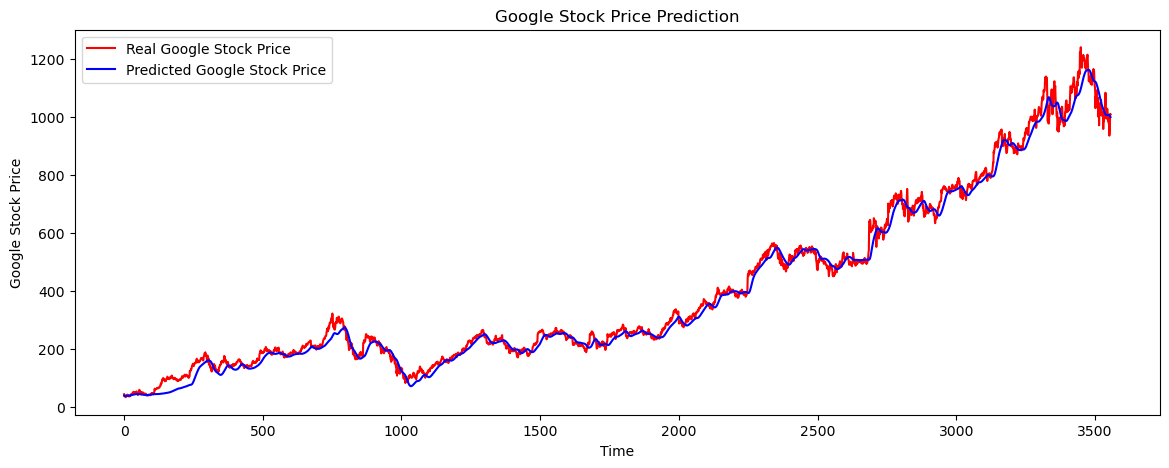

In [114]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()